In [17]:
%matplotlib inline
import numpy as np
from mesa import Agent, Model
from mesa.time import RandomActivation

In [22]:
class Warrior(Agent):
    """ A warrior is an agent equipped with experience points (XP) and capable
    of hunting products provide sustenance for their village.

    Args:
        key (int): a unique identifier for this agent.
        model (Model): the system this agent belongs to.
    """
    def __init__(self, key, model):
        super().__init__(key, model)

        # agent start with 1 XP and some strength to be their hunting ability
        self.id = key
        self.xp = 1
        self.strength = np.random.randint(1, 10)

    def step(self):
        """ Defines what each agent executes per unit of time; inherited"""

        # --- agent is out and hunting ---
        # if agent had successful hunt, gain some strength and xp
        is_hunt_success = np.random.uniform(0, 1) >= .8
        if is_hunt_success:
            self.xp += 2.
            self.strength += 3

        # --- agent back in village, challenges other agent to strength test ---
        do_wrestle = np.random.uniform(0, 1) > .85
        if do_wrestle:

            # winner is that who has the most xp * strength
            other = np.random.choice(self.model.schedule.agents)
            if self.strength < other.strength:
                self.xp -= 2.
                other.xp += 1.
            else:
                other.xp -= 2.
                self.xp += 1.

In [25]:
class Village(Model):

    """A model with some number of agents.
    
    Args:
        n (int): number of Warrior instances to create.
    """
    def __init__(self, n):
        super().__init__()
        self.num_agents = n
        self.schedule = RandomActivation(self)
        
        # create our `n` agents and add to our model
        for i in range(self.num_agents):
            agent = Warrior(i, self)
            self.schedule.add(agent)

    def step(self):
        """Akin to one unit of time; inherited from super-class."""
        self.schedule.step()

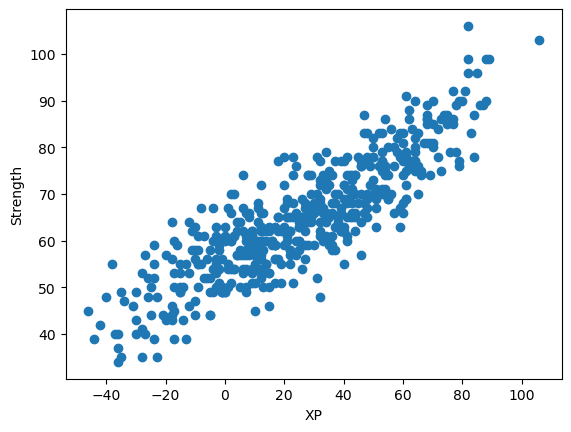

In [27]:
import matplotlib.pyplot as plt


# run the model with many agents
model = Village(n=500)
for i in range(100):
    model.step()

# read-out agent data from the model
data = np.asarray(list(map(lambda x: (x.xp, x.strength), model.schedule.agents)))

# plot the XP (x axis) and strength (y axis)
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel("XP")
plt.ylabel("Strength")
plt.show()

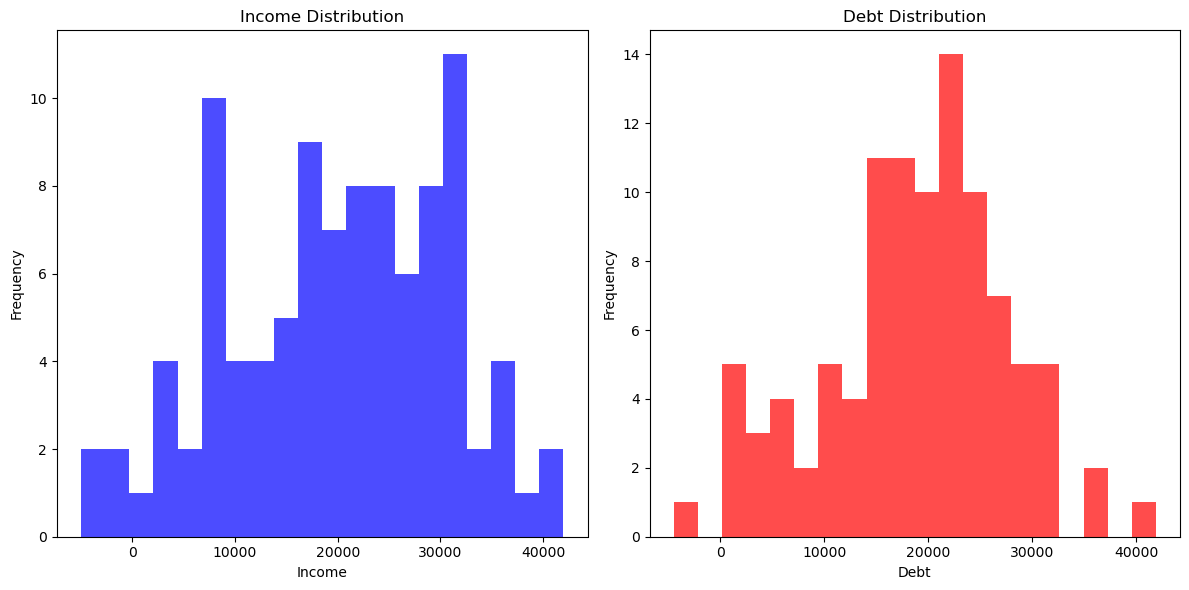

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.time import RandomActivation

class HouseholdAgent(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        # Initialize agent
        self.income = np.random.normal(20000, 10000)  # Random normal distribution for income
        self.debt = np.random.normal(20000, 10000)  # Random normal distribution for debt

    def step(self):
        pass

class EconomyModel(Model):
    def __init__(self, num_agents):
        super().__init__()
        self.num_agents = num_agents
        self.schedule = RandomActivation(self)

        # Create agents
        for i in range(self.num_agents):
            a = HouseholdAgent(i, self)
            self.schedule.add(a)

    def step(self):
        self.schedule.step()

# Set up the model
num_agents = 100
model = EconomyModel(num_agents)

# Run the model for multiple steps
for i in range(100):
    model.step()

# Data collection
data = np.array([[agent.income, agent.debt] for agent in model.schedule.agents])

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Income Distribution
axs[0].hist(data[:, 0], bins=20, alpha=0.7, color='blue')
axs[0].set_title('Income Distribution')
axs[0].set_xlabel('Income')
axs[0].set_ylabel('Frequency')

# Plot Debt Distribution
axs[1].hist(data[:, 1], bins=20, alpha=0.7, color='red')
axs[1].set_title('Debt Distribution')
axs[1].set_xlabel('Debt')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Income Observation:
The income distribution appears to be roughly normally distributed, centered around a mean income of 20,000 dollars and indicate a relatively diverse population in terms of income levels.

Debt Observation:
The debt distribution also appears to be roughly normally distributed, centered around a mean debt of 15,000 dollars and some levels are higher in debt compared to others in the population.